In [1]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#4
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [3]:
#5
gdp_df.shape

(7662, 4)

#### Question 5 part 1
7662 rows
4 columns

In [5]:
#5
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

#### Question 5 part 2
Country or Area  =  object
***
Year = int64
***
Value = float64
***
Value Footnotes = float64

In [7]:
#6
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [8]:
#7
data_complete = gdp_df.Country.value_counts().reset_index().sort_values(by = 'count', ascending = True)
data_complete = data_complete.loc[data_complete['count'] == max(gdp_df.Year) - min(gdp_df.Year) + 1]

#### Question 7 part 1 
202 countries with complete data

In [10]:
#7
countries_missing_data = gdp_df.Country.value_counts().reset_index().sort_values(by = 'count', ascending = True)
countries_missing_data = countries_missing_data.loc[countries_missing_data['count'] < max(gdp_df.Year) - min(gdp_df.Year) + 1]

#### Question 7 part 2 & 3
40 countries with incomplete data
****
Countries with less than half of data:
* Djibouti
* Somalia
* Turks and Caicos Islands
* Sint Maarten (Dutch part)
* Kosovo
* Cayman Islands

<function matplotlib.pyplot.show(close=None, block=None)>

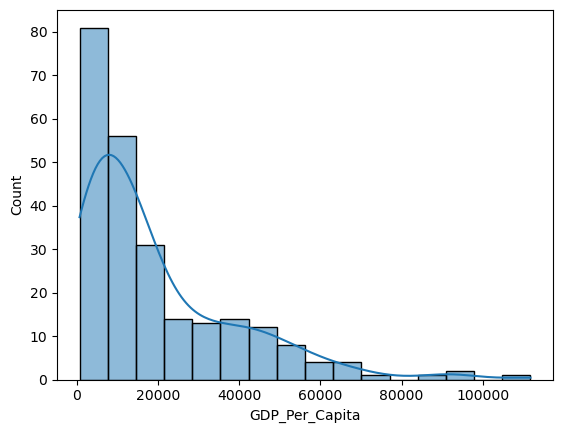

In [12]:
#8
sns.histplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

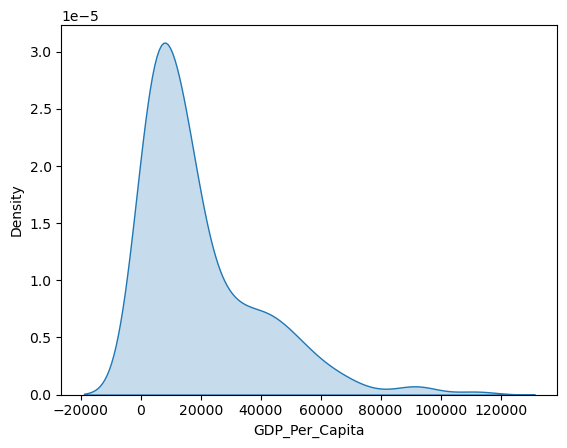

In [13]:
#8
sns.kdeplot(gdp_df["GDP_Per_Capita"].loc[gdp_df.Year == 2020], fill=True)
plt.show

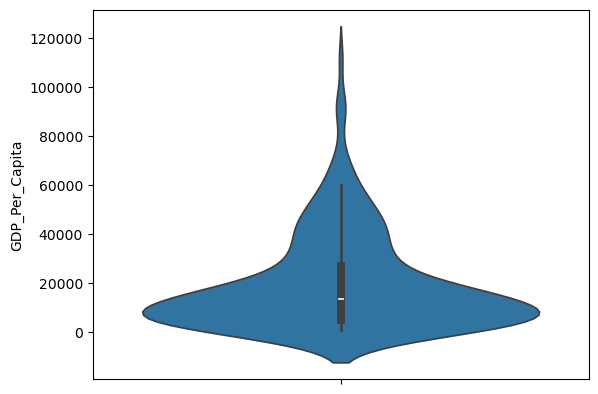

In [14]:
#8
sns.violinplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

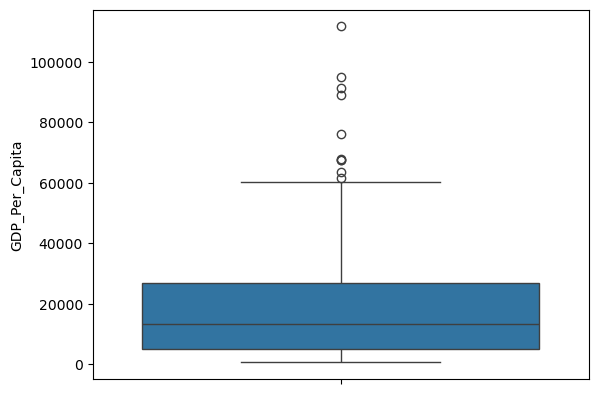

In [15]:
#8
sns.boxplot(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020])
plt.show()

In [16]:
#9
round(gdp_df.GDP_Per_Capita.loc[gdp_df.Year == 2020].median(), 2)

13358.0

#### Question 9 
Median GDP per Capita in 2020 : 13358.0

In [18]:
#10
gdp_decades = pd.DataFrame()
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

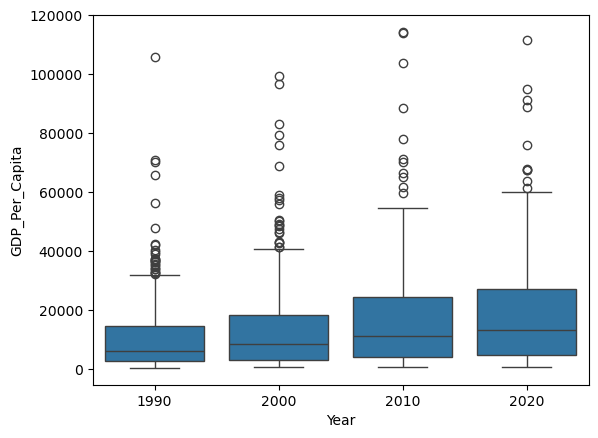

In [19]:
#10
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

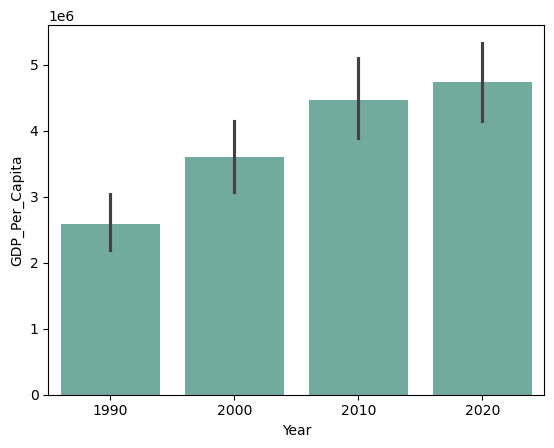

In [20]:
#10
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum,  
    color='#69b3a2');

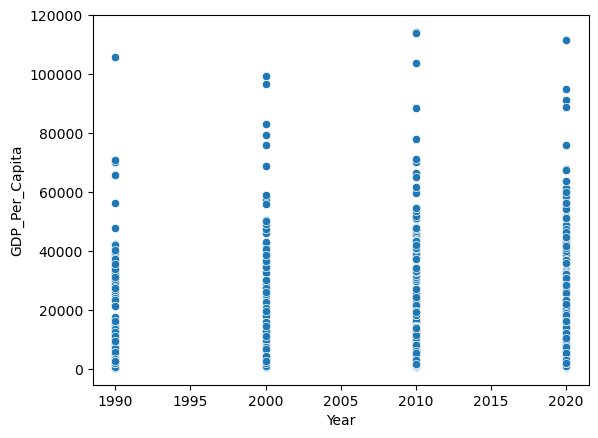

In [21]:
#10
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

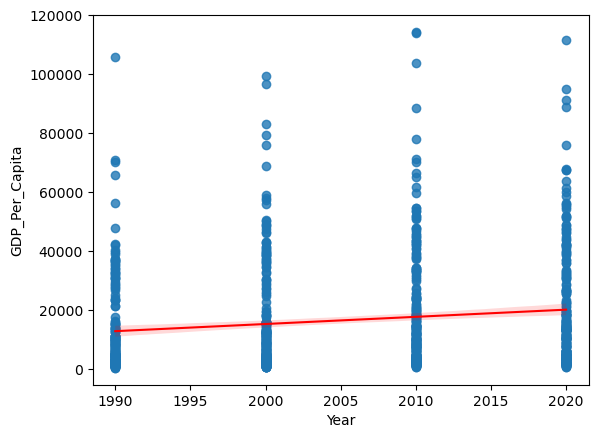

In [22]:
#10
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
)
plt.show()

In [23]:
#11
gdp_df.loc[gdp_df["GDP_Per_Capita"] > 100000].sort_values(by = "Year", ascending=True).head(1)['Country']

7302    United Arab Emirates
Name: Country, dtype: object

#### Question 11
United Arab Emirates

In [25]:
#12
highest_gdp_2020 = gdp_df.loc[gdp_df["Year"] == 2020].sort_values(by = "GDP_Per_Capita", ascending=False).head(1)['Country']

4148    Luxembourg
Name: Country, dtype: object

#### Question 12
Luxemborg

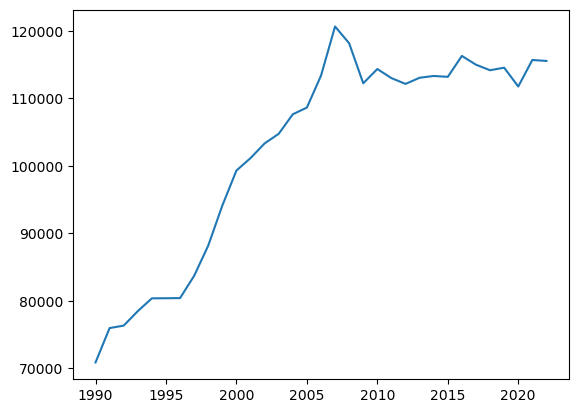

In [27]:
#12
plt.plot('Year', 'GDP_Per_Capita', data=gdp_df.loc[gdp_df["Country"] == 'Luxembourg'])
plt.show()

In [28]:
#13
lowest_gdp_2020 = gdp_df.loc[gdp_df["Year"] == 2020].sort_values(by = "GDP_Per_Capita", ascending=True).head(1)['Country']

973    Burundi
Name: Country, dtype: object

#### Question 13 
Burundi

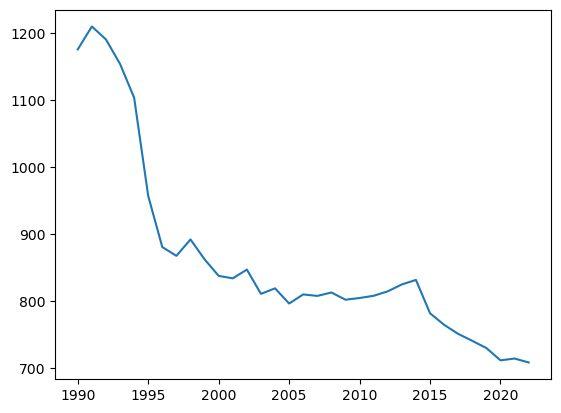

In [30]:
#13
plt.plot('Year', 'GDP_Per_Capita', data=gdp_df.loc[gdp_df["Country"] == 'Burundi'])
plt.show()

In [55]:
#14/#15
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df = internet_df.rename(columns = {"Country or Area" : "Country", "Value" : "Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [57]:
#14
internet_df.tail()

,Country,Year,Internet_Users_Pct
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [159]:
#16
countsperyear = internet_df.Year.value_counts().reset_index().sort_values(by ='Year', ascending=False)

#### Question 16
1991-1994 & 2023 are exceptionally low 

In [92]:
#17
first_year_internet_use = internet_df.loc[internet_df["Internet_Users_Pct"] > 0.0].sort_values(by = 'Year', ascending=True).head(1)['Year']

1570    1990
Name: Year, dtype: int64

#### Question 17
First year internet use above 0 was 1990

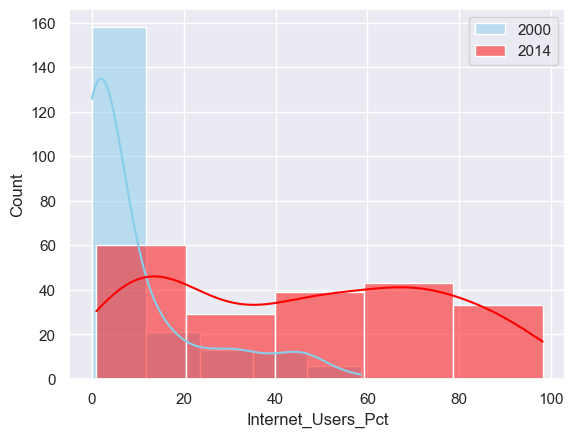

In [64]:
#18
sns.set_theme(style="darkgrid")
sns.histplot(data=internet_df.loc[internet_df["Year"] == 2000], x="Internet_Users_Pct", bins=5, color="skyblue", label="2000", kde=True)
sns.histplot(data=internet_df.loc[internet_df["Year"] == 2014], x="Internet_Users_Pct", bins=5, color="red", label="2014", kde=True)

plt.legend() 
plt.show()

In [71]:
#19
internet_df.loc[(internet_df["Year"] == 2014) & (internet_df["Internet_Users_Pct"] < 5)].value_counts().sum()

10

#### Question 19 
In 2014, 10 countries lower than 5% of the population using the internet in 2014

In [73]:
#20
gdp_and_internet_use = gdp_df.merge(internet_df, how = 'outer', on = ["Country","Year"])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809


In [75]:
#20
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9107,Zimbabwe,2018,2399.621551,25.0000
9108,Zimbabwe,2019,2203.396810,26.5883
9109,Zimbabwe,2020,1990.319419,29.2986
9110,Zimbabwe,2021,2115.144555,32.4616
9111,Zimbabwe,2022,2143.237574,32.5615


In [165]:
top3_2014 = gdp_and_internet_use.loc[gdp_and_internet_use["Year"] == 2014].nlargest(4, 'Internet_Users_Pct')['Country']

3820                        Iceland
2780    Falkland (Malvinas) Islands
794                         Bermuda
6243                         Norway
Name: Country, dtype: object

#### Question 21 
Top 3 in 2014 were Iceland, Falkland Islands, and Bermuda
Falkland Islands would't populate graph in Facetgrid, 
so I used Norway because it had the next highest Internet Users Pct in 2014

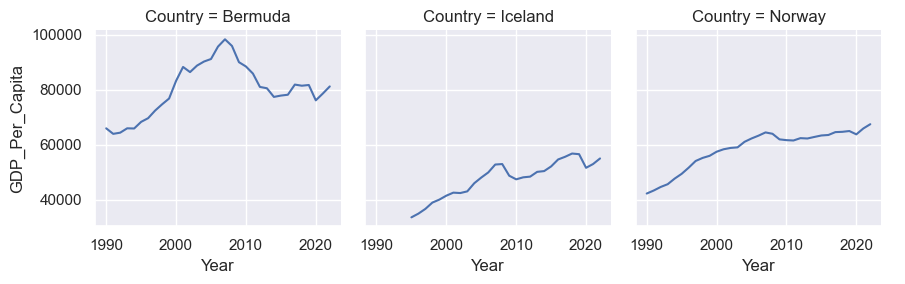

In [181]:
#21
top3_overtime = gdp_df.loc[gdp_df["Country"].isin(['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda', 'Norway'])]
g = sns.FacetGrid(top3_overtime, col = "Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita")
g.add_legend()

In [183]:
#22
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use["Year"] == 2014]

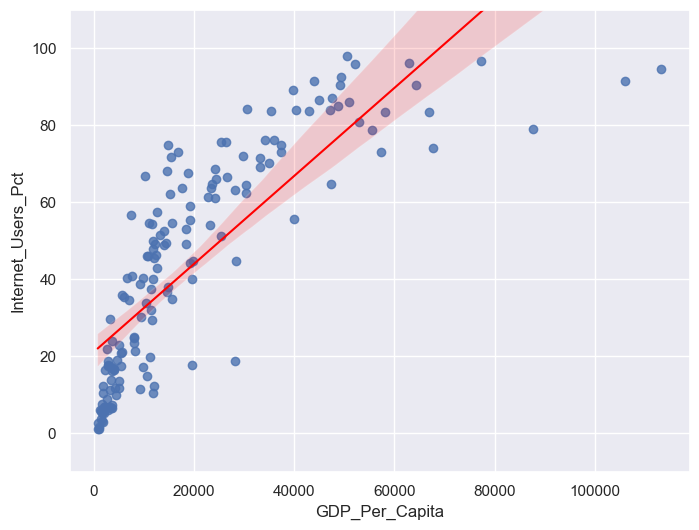

In [185]:
#23
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.regplot(
    x=gdp_and_internet_use_2014["GDP_Per_Capita"],
    y=gdp_and_internet_use_2014["Internet_Users_Pct"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
graph.set_ylim(bottom = -10, top = 110)
plt.show()

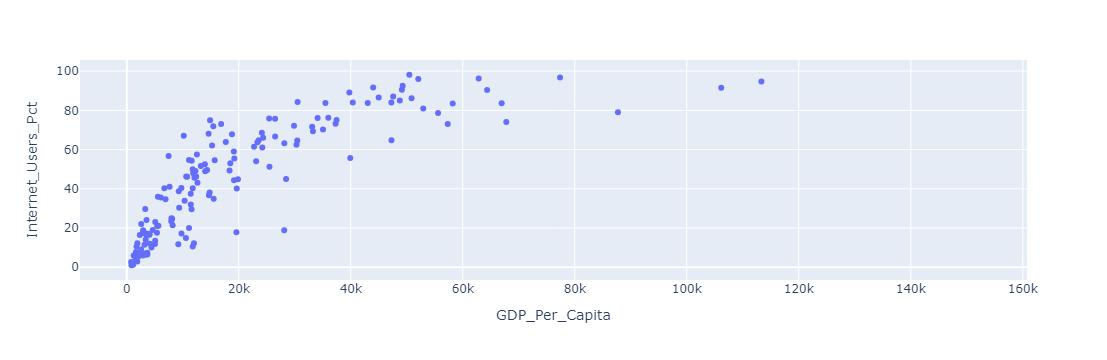

In [187]:
#23
import plotly.express as px

graph = px.scatter(gdp_and_internet_use_2014,
    x=gdp_and_internet_use_2014["GDP_Per_Capita"],
    y=gdp_and_internet_use_2014["Internet_Users_Pct"],
    hover_name="Country", hover_data=["GDP_Per_Capita", "Internet_Users_Pct"]
)
graph.show()

In [191]:
#24
gdp_and_internet_use_2014["GDP_group"] = pd.qcut(gdp_and_internet_use_2014.loc[: , ("GDP_Per_Capita")], [0,0.33,0.66,1.0], labels=["Low", "Medium", "High"])

C:\Users\corne\AppData\Local\Temp\ipykernel_30932\1721820031.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
#25
gdp_and_internet_use_2014["GDP_Per_Capita"].loc[gdp_and_internet_use_2014["GDP_group"] == 'Low'].median()

3377.152930164516

In [195]:
#25
gdp_and_internet_use_2014["GDP_Per_Capita"].loc[gdp_and_internet_use_2014["GDP_group"] == 'Medium'].median()

12031.732091628928

In [197]:
#25
gdp_and_internet_use_2014["GDP_Per_Capita"].loc[gdp_and_internet_use_2014["GDP_group"] == 'High'].median()

37366.69587731947